<a href="https://colab.research.google.com/github/Devarsh1302/Task_4/blob/main/Task_4_devarsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score)

# **Load Dataset**

In [5]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# **Train/Test Split and Standardization**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Logistic Regression Model**

In [7]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# **Predictions**

In [8]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# **Evaluation Metrics**

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))



Confusion Matrix:
 [[41  2]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9722222222222222
Recall: 0.9859154929577465
ROC-AUC Score: 0.99737962659679


# **ROC Curve**

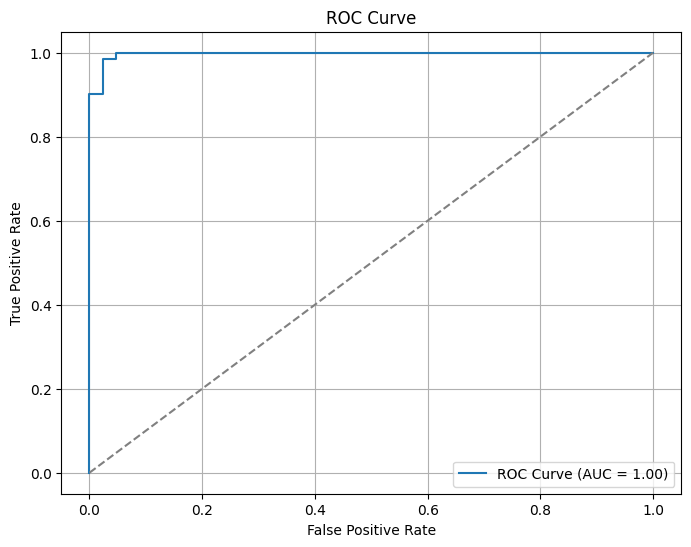

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# **Sigmoid Function Explanation**

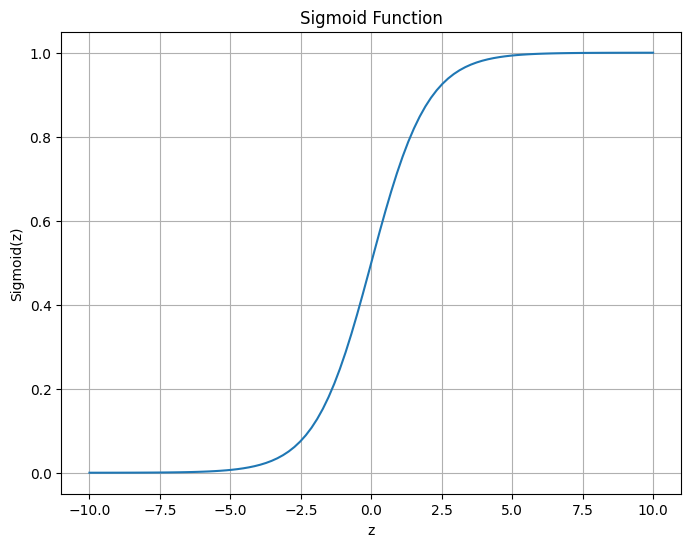

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)
plt.figure(figsize=(8,6))
plt.plot(z_values, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.show()